In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


EDA

Average gdp per country, average life expectancy

In [3]:
chile_avg = data.GDP[data.Country == 'Chile'].mean()
unique_countries = data.Country.unique()
countries_avg_gdp = []
countries_avg_life_expectancy = []

for country in unique_countries:
    countries_avg_gdp.append(data.GDP[data.Country == country].mean())
    countries_avg_life_expectancy.append(data['Life expectancy at birth (years)'][data.Country == country].mean())

countries_gdp_avg_dict = {i: [j,k] for i,j,k in zip(unique_countries, countries_avg_life_expectancy, countries_avg_gdp)}
print(countries_gdp_avg_dict)

{'Chile': [78.94374999999998, 169788845015.3125], 'China': [74.26249999999999, 4957713750000.0], 'Germany': [79.65625, 3094775625000.0], 'Mexico': [75.71875, 976650625000.0], 'United States of America': [78.0625, 14075000000000.0], 'Zimbabwe': [50.09375000000001, 9062579595.0625]}


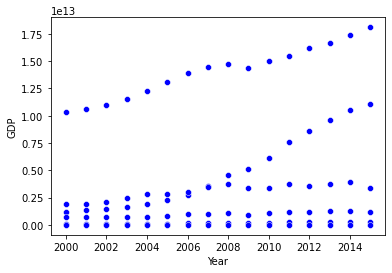

<Figure size 432x288 with 0 Axes>

In [7]:
sns.scatterplot(x=data.Year, y=data.GDP, color="Blue")
plt.show()
plt.savefig('1.year_vs_gdp.PNG')

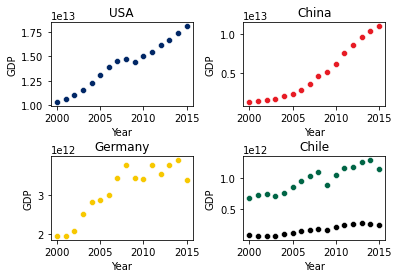

In [10]:
ax = plt.subplot(2,2,1)
sns.scatterplot(x=data.Year, y=data.GDP[data.Country == 'United States of America'], color='#012766')
ax.set_title('USA')
ax1 = plt.subplot(2,2,2)
sns.scatterplot(x=data.Year, y=data.GDP[data.Country == 'China'], color='#E71B24')
ax1.set_title('China')
ax2 = plt.subplot(2,2,3)
ax2.set_title('Germany')
sns.scatterplot(x=data.Year, y=data.GDP[data.Country == 'Germany'], color='#f7c800')
ax3 = plt.subplot(2,2,4)
sns.scatterplot(x=data.Year, y=data.GDP[data.Country == 'Mexico'], color='#006545')
ax3.set_title('Mexico')
plt.subplots_adjust(wspace=.35, hspace=.6)
sns.scatterplot(x=data.Year, y=data.GDP[data.Country == 'Chile'], color='Black')
ax3.set_title('Chile')
plt.subplots_adjust(wspace=.35, hspace=.6)
plt.savefig('2.subplot_yearvsgdp.PNG')

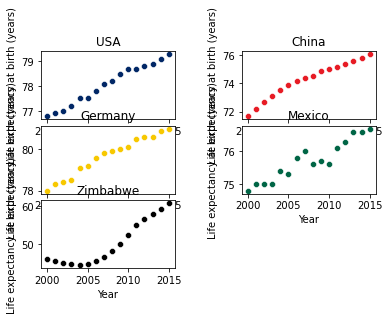

In [11]:
ax = plt.subplot(3,2,1)
sns.scatterplot(x=data.Year, y=data['Life expectancy at birth (years)'][data.Country == 'United States of America'], color='#012766')
ax.set_title('USA')
ax1 = plt.subplot(3,2,2)
sns.scatterplot(x=data.Year, y=data['Life expectancy at birth (years)'][data.Country == 'China'], color='#E71B24')
ax1.set_title('China')
ax2 = plt.subplot(3,2,3)
ax2.set_title('Germany')
sns.scatterplot(x=data.Year, y=data['Life expectancy at birth (years)'][data.Country == 'Germany'], color='#f7c800')
ax3 = plt.subplot(3,2,4)
sns.scatterplot(x=data.Year, y=data['Life expectancy at birth (years)'][data.Country == 'Mexico'], color='#006545')
ax3.set_title('Mexico')
plt.subplots_adjust(wspace=.5, hspace=.1)
ax4 = plt.subplot(3,2,5)
sns.scatterplot(x=data.Year, y=data['Life expectancy at birth (years)'][data.Country == 'Zimbabwe'], color='#000000')
ax4.set_title('Zimbabwe')

plt.savefig('3.subplot_year_vs_lifeexp.PNG')

Life expectancy vs GDP regression per country

**USA**

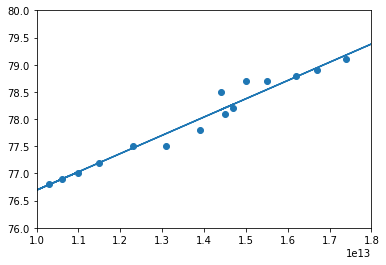

In [21]:
# def regression(country, data)
new_column_names = ['country', 'year', 'life_expectancy', 'gdp']
data.columns = new_column_names
model = sm.OLS.from_formula('life_expectancy ~ gdp', data=data[data.country =='United States of America'])
results = model.fit()
results.params
multiplyer = {'13': 10000000000000, 12: 1000000000000}

plt.scatter(data.gdp[data.country == 'United States of America'], data.life_expectancy[data.country == 'United States of America'])
plt.plot(data.gdp, results.params[0]+results.params[1]*data.gdp)
plt.axis([1.0*multiplyer['13'],1.8*multiplyer['13'],76,80])
plt.plot()
plt.savefig('regression_line.PNG')

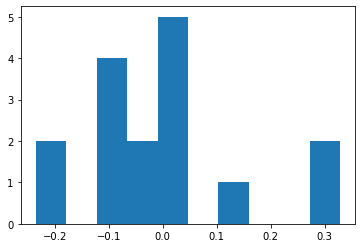

In [22]:
fitted_values = results.predict(data[data.country =='United States of America'])
residuals = data.life_expectancy[data.country =='United States of America'] - fitted_values
plt.hist(residuals)
plt.savefig('normality_test.PNG')

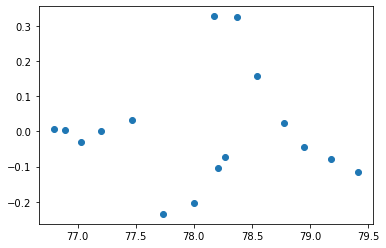

In [23]:
plt.scatter(fitted_values, residuals)
plt.savefig('homoscedasticity.PNG')

**Covariance, Correlation**

In [15]:
np.cov(data.life_expectancy, data.gdp)

corr_life_expectancy_gdp, p = pearsonr(data.life_expectancy, data.gdp)
print(corr_life_expectancy_gdp, p)

0.343206748449156 0.0006187129569469811


- Strong correlation
- strong covariance

In [16]:
corr_life_expectancy_usa, p = pearsonr(data.life_expectancy[data.country == 'United States of America'], data.gdp[(data.country == 'United States of America')])
print(corr_life_expectancy_usa)
corr_life_expectancy_germany, p = pearsonr(data.life_expectancy[data.country == 'Germany'], data.gdp[(data.country == 'Germany')])
print(corr_life_expectancy_germany)
corr_life_expectancy_china, p = pearsonr(data.life_expectancy[data.country == 'China'], data.gdp[(data.country == 'China')])
print(corr_life_expectancy_china)
corr_life_expectancy_mexico, p = pearsonr(data.life_expectancy[data.country == 'Mexico'], data.gdp[(data.country == 'Mexico')])
print(corr_life_expectancy_mexico)
corr_life_expectancy_zimbabwe, p = pearsonr(data.life_expectancy[data.country == 'Zimbabwe'], data.gdp[(data.country == 'Zimbabwe')])
print(corr_life_expectancy_zimbabwe)
corr_life_expectancy_chile, p = pearsonr(data.life_expectancy[data.country == 'Chile'], data.gdp[(data.country == 'Chile')])
print(corr_life_expectancy_chile)

0.9817092382430257
0.932698898256127
0.9085255408648357
0.932237716784708
0.9661998955858778
0.9498766659254412


Correlation is more significant in countries with lower GDP

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


[]

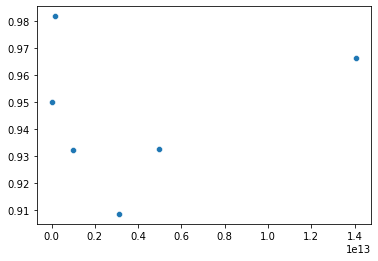

In [17]:
correlation_array = np.array([corr_life_expectancy_usa, corr_life_expectancy_germany, corr_life_expectancy_china, corr_life_expectancy_mexico, corr_life_expectancy_zimbabwe, corr_life_expectancy_chile])
gdp_mean_array = []


for country in data.country.unique():
    gdp_mean_array.append(data.gdp[data.country == country].mean())
print(data.country.unique())

sns.scatterplot(x=gdp_mean_array, y=correlation_array)
plt.plot()

- it is interesting to see that the signifancy of correlation is not completely correlative to average GDP, maybe this is due to the methods of data aquired.


In [18]:
corr_correlation_mean_gdp, p = pearsonr(correlation_array, gdp_mean_array)
print(corr_correlation_mean_gdp, p)

0.1612878577505496 0.7601660662384232


- this is still correlative, but we are stretching it a little.

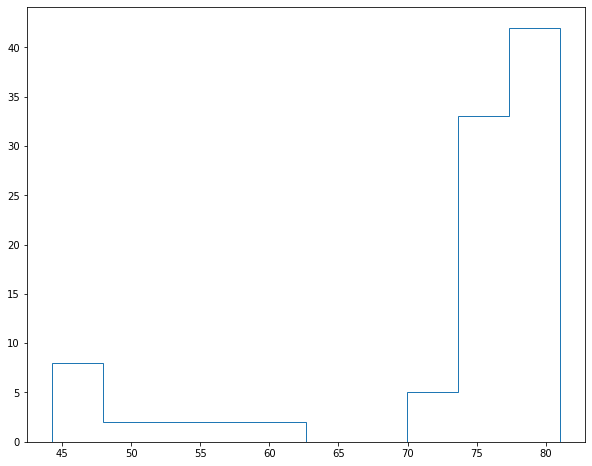

In [24]:
plt.figure(figsize=(10,8))
plt.hist(data.life_expectancy, histtype='step')
plt.savefig('life_expectanct_hist.PNG')

(array([52., 16.,  6.,  1.,  2.,  4.,  4.,  3.,  5.,  3.]),
 array([4.41570280e+09, 1.81397413e+12, 3.62353256e+12, 5.43309099e+12,
        7.24264942e+12, 9.05220785e+12, 1.08617663e+13, 1.26713247e+13,
        1.44808831e+13, 1.62904416e+13, 1.81000000e+13]),
 <BarContainer object of 10 artists>)

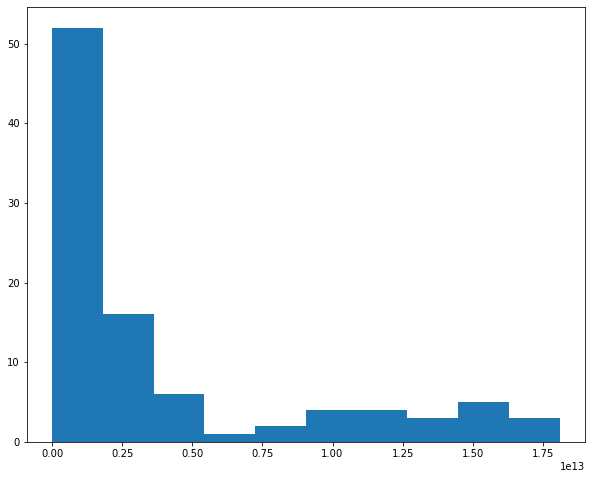

In [20]:
plt.figure(figsize=(10,8))
plt.hist(data.gdp)
plt.savefig('')